<a href="https://colab.research.google.com/github/nicsim22/DS110-Content/blob/main/Lecture23DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

*Cynthia flushed with pride as her fellow SAGE analysts applauded her.  Her k-nearest neighbors model had correctly predicted the next three cities with outbreaks.  It also predicted ten cities would get BND that hadn't yet, but hey, maybe it was just a matter of time.*

*After everybody else got back to work, Aubin pulled Cynthia aside.  "So you know your thing could be better," he said.  "Backing off to a simple model was smart.  But we could use more accuracy, and we could use more inspectability.  We've got to know **why** people are getting sick."*

<i>"So, decision trees?"</i>

<i>Aubin winced a little, but said, "Sure.  Let's start there."</i>

# Decision trees: a next step in ML

Decision trees will be our first machine learning (ML) method that builds a classifier in response to data that is distinct from the data.  The final form of this classifier will be a tree.  The interior nodes of the tree store yes or no questions, and the leaves of the tree store classifications.


<img src=" 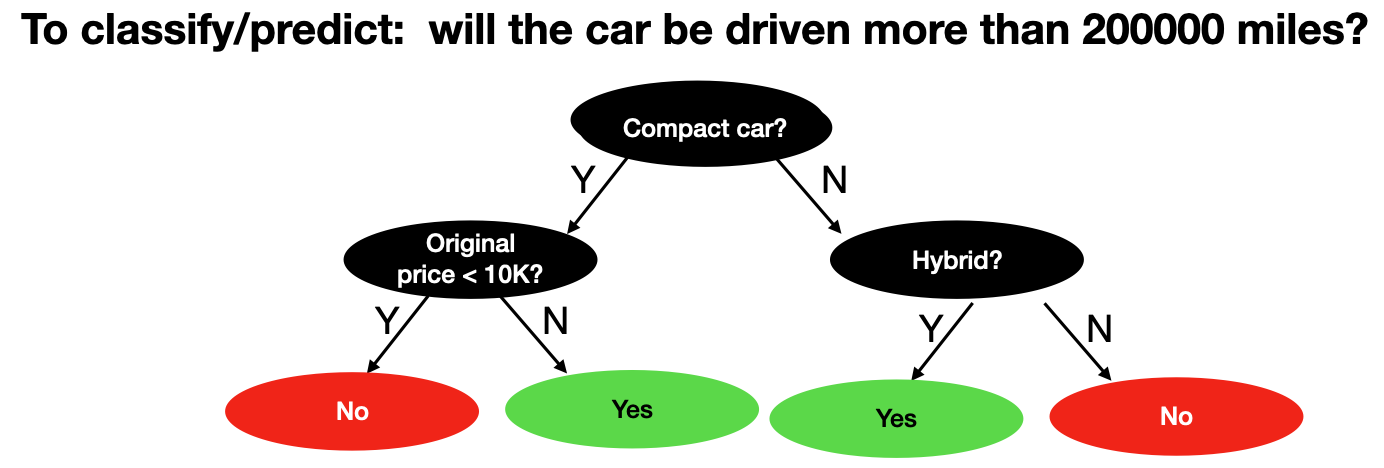">


When classifying, the algorithm starts at the top, asks the first question, and moves left or right as a result of the answer being **yes or no**.  The questions continue **until a leaf is reached**, and that is the **classification**.  There could be many more leaves than possible classifications, which means there can be multiple ways to output the same classification.

//multiple leaves can make it into the target class (i.e. multiple ways to get yes or no)//



Decision trees have the advantage of being inspectable and transparent compared to other methods.  It's easy to say why something was classified.  "That person did not get the loan approved because their income was low and they already declared bankruptcy once."

However, this is also a **limitation**, as the classifier **needs to stick closely to the original features** of the dataset when coming up with its rules; it can't come up with new, unintuitive features as easily as a neural network.
//transpaency and readability makes accuracy suffer, restricting flexibility of machine learning (double check??)//


# Constructing a decision tree - first stump

The decision tree algorithm doesn't create the best possible tree that it could.  Doing so in an efficient amount of time is known to be probably impossible.  Instead, the decision tree creation algorithm is "greedy," a general term for algorithms that just try to do the best-looking thing in the moment, without rethinking earlier decisions.  It constructs, from all the features and their values, what looks like the best first decision to make, and it doesn't look back.

//goal is to create the best possible questions, good questions for the top of the tree and the sub-branches//

What makes for a good decision?  Ideally, it's a decision that makes it so that examples that answer "yes" all agree on their classification, and examples that answer "no" all agree on their classification.

<img src=" 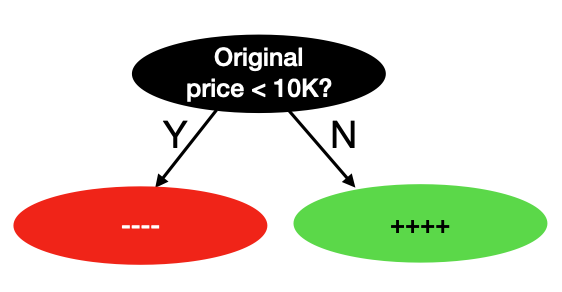">



Of course, the world is messier than that, and so there will probably be at **least a few labels inconsistent with the majority** down each path.  If we don't get a perfect split, what's a good measure of how well a decision "**cleans up**" the example classifications, so they each at least agree more down each path?



# Entropy

Entropy is a measure of **how much "surprise" is possible** in a stream of symbols.  When **all symbols agree**, there's no surprise possible in drawing one at random, and the **entropy is 0**.  When the **symbols are perfectly balanced between two possible symbols**, that is the **maximum possible entropy** for two symbols - you have no idea which one will come next - and the **entropy is one**.



The formula for entropy is $\sum_i - p_i \log_2 p_i$, where $p_i$ is the frequency of the symbol (ranging from 0 for not appearing to 0.5 appearing half the time, etc).  For our purposes, it's just a metric that is 0 for perfect agreement, 1 for perfect disagreement, and in between for in between.



<img src=" 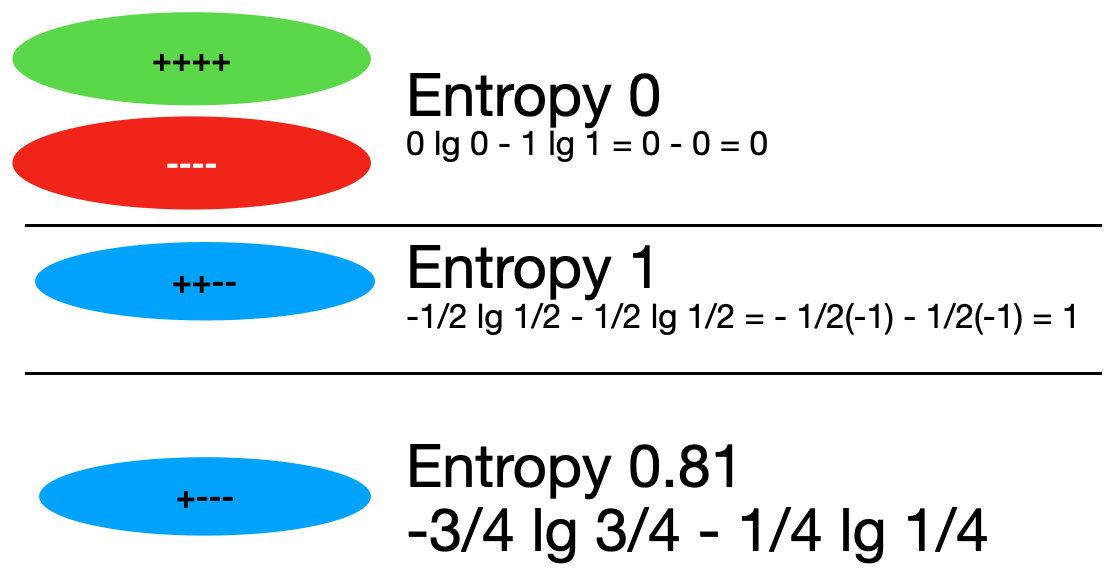">

//last example above --> (1/4) lg (1/4) for the only + out of all symbols//

Recall that there are *two* piles of examples after a decision is made: "yes to decision" and "no to decision".  Therefore, there are two entropies.  How to combine them?  We can take a weighted average of the two, with each weight the probability of that answer to the decision question.

$\begin{equation}
Pr(yes)Entropy(yes) + Pr(no)Entropy(no)
\end{equation}$

where Pr(yes) = [count of examples answering "yes" to decision]/[count of both "yes" and "no" examples] and similarly for Pr(no).


For example, suppose we're trying to predict whether a car gets driven to over 200000 miles, and the feature to evaluate is, "Is it a Toyota Corolla?"  We have 5 examples of Corollas in our database, and they all got driven over 200000 miles.  We have 2000 cars in our database that are not Corollas, and about 20% of them got driven to over 200000 miles.

The entropy for the "yes" branch of the question is 0, and its probability is 5/2005.  The no branch probability is 2000/2005, and its entropy is -0.2 log 0.2 - 0.8 log 0.8.  We calculate the expected entropy below.

In [ ]:
import math
yes_branch_entropy = 0 #all corollas
no_branch_entropy = -0.2 * math.log(0.2,2) - 0.8 * math.log(0.8, 2) #20% driven over 200,0000\
pr_yes = 5/2005
pr_no = 2000/2005
print(pr_yes * yes_branch_entropy + pr_no * no_branch_entropy) #rmb 'or' in probability is plus so thats why + here ('and' is times!)

0.7201277754487405


# Adding recursion

So we can **iterate through all possible decisions and choose the one that has the lowest expected entropy**.  We could just stop there, and have a tree with one parent and two children.  This is called creating a "decision stump," and it can be useful when combined with other meta-algorithms called ensemble learners.  But the **decision tree algorithm recursively creates more branches down the left and right sides - until there is minimal disagreement in labels** (split until perfect agreement in each pile at the end), it continues to further split the data.  Once the labels agree, that can become a leaf node of the tree with a classification.

<img src=" 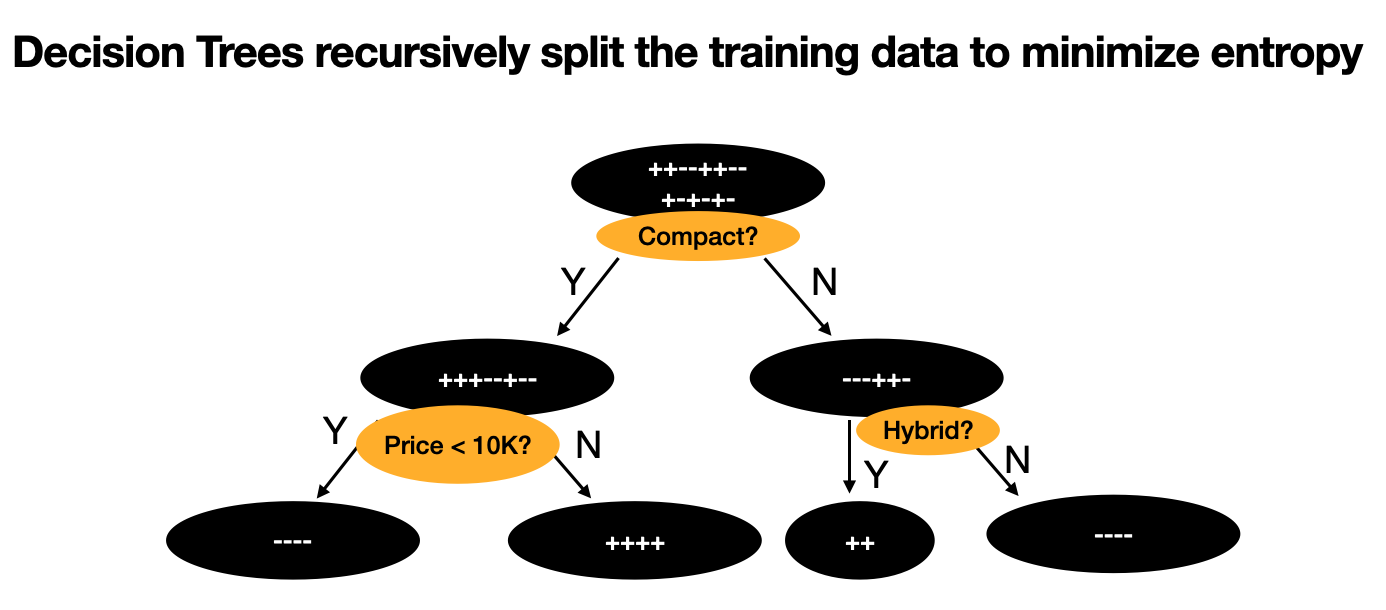">


It's also possible, because real data is inconsistent, that the algorithm runs out of questions that help at all.  The **entropy may not drop if there's no question that actually helps answer the classification problem**.  So we also need to check whether the best question choice actually helped, and if it didn't, stop and create a leaf with the majority label instead.


Here is some pseudocode for the recursive decision tree constructor:

DecisionTreeNode(examples):
* If the examples all agree on a label, return a leaf with that label
* Iterate through all questions about features to get question Q with best expected entropy
* If the expected entropy for Q **isn't an improvement** over the current entropy, **stop and make this a leaf with classification according to majority rule**
* Recursively create a "yes" branch with examples that answer "yes" to Q
* Recursively create a "no" branch with examples that answer "no" to Q

# Using Decision Trees in scikit-learn

Decision trees are another **ML technique** you can use in scikit-learn.  **fit(), predict(), and score()** all work the way they do for kNNs.

The dataset is a classic statistical dataset, classifying iris flowers from four anatomical features.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names #three species present in set, so entropy can go above 1

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

Since the features are numerical, decision tree learning will try, f**or every feature, every possible split** at values observed in the data.

In [ ]:
features_train, features_test, labels_train, labels_test = \ #\ for same line of code to continue on the next line
train_test_split(iris.data, iris.target, test_size=0.1, random_state=110)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dtree = DecisionTreeClassifier(criterion="entropy", random_state=110) #random state specified so that results are always the same
dtree.fit(features_train, labels_train)
dtree.score(features_test, labels_test) # Gives accuracy --> 93% text accuracy

0.9333333333333333

An advantage of decision trees is that we can easily see their representation - although they get complex fast!

[Text(0.4, 0.9166666666666666, 'petal width (cm) <= 0.8\nentropy = 1.583\nsamples = 135\nvalue = [47, 42, 46]\nclass = setosa'),
 Text(0.3, 0.75, 'entropy = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'petal width (cm) <= 1.75\nentropy = 0.999\nsamples = 88\nvalue = [0, 42, 46]\nclass = virginica'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'petal length (cm) <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'entropy = 0.0\nsamples = 39\nvalue = [0, 39, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'petal width (cm) <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.2, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.4, 0.25, 'petal length (cm) <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]\nclass = versicolor'),
 Text(0.3, 0.0833

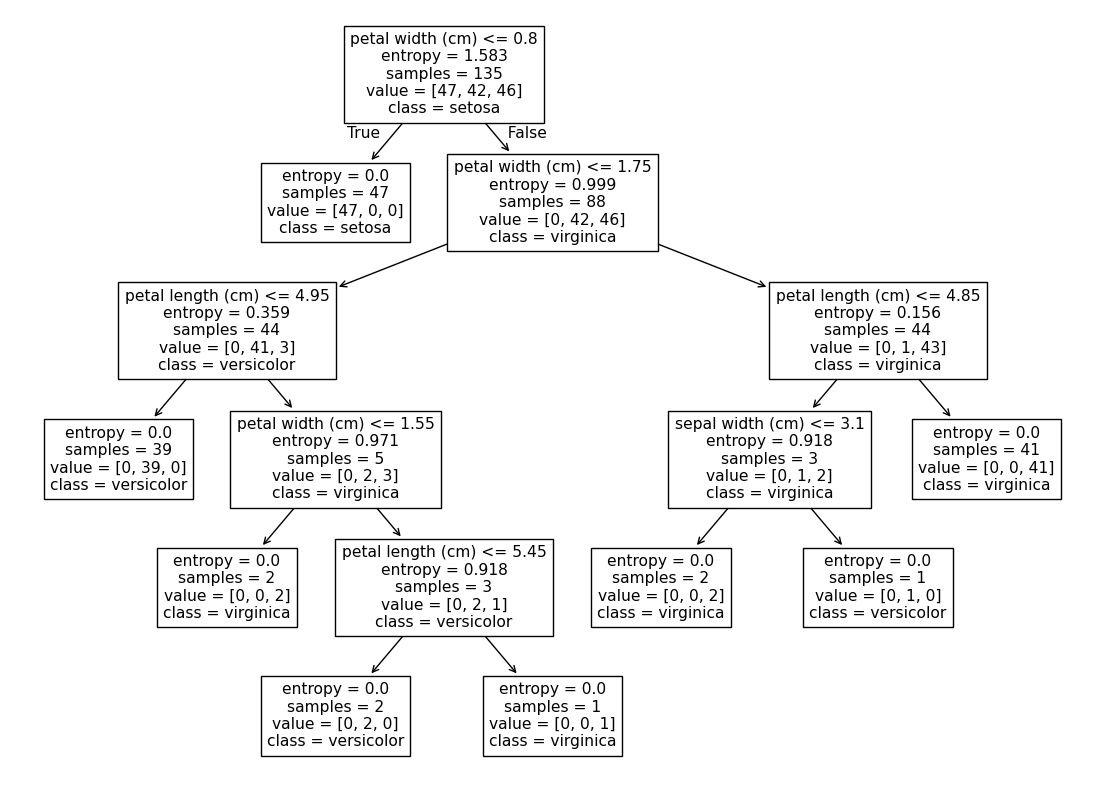

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(14,10)) #just changing the dimensions of the figure
tree.plot_tree(dtree, feature_names = iris.feature_names, class_names = iris.target_names) #tree as first element, then feature_names, then class_names

#every leaf that says entropy = 0 means that we were able to create perfect agreement between all symbols in that subset

# Overfitting

//good for the training set, but not test set//

It's possible for decision trees to overfit to the data, creating hypotheses that agree with the training data, but not the test data.  An example of an absurd rule would be to classify anybody named "Simon" as unworthy of a loan, because there one person in the training data named "Simon" who shouldn't get a loan.  A car classifier with license plates as a feature could have a similar problem.  Basically, any very specific patterns that can be found in training run the risk of being useless or worse during testing.



There are a variety of things you can do to **counter overfitting**.  scikit-learn comes with a variety of optional arguments to limit the complexity of the tree:  **create a max depth, require a minimum information gain to split, and so on**.  It's a good idea to try such methods when dealing with **complex** datasets.